In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
print(tf.__version__)

2.5.0


In [3]:
df = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/BreastCancer.csv")
df.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [4]:
dum_df = pd.get_dummies(df)
dum_df.drop(['Class_Benign'],axis="columns",inplace = True)
dum_df.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,61634,5,4,3,1,2,2,2,3,1,0
1,63375,9,1,2,6,4,10,7,7,2,1
2,76389,10,4,7,2,2,8,6,1,1,1
3,95719,6,10,10,10,8,10,7,10,7,1
4,128059,1,1,1,1,2,5,5,1,1,0


In [5]:
dum_df.shape

(699, 11)

In [6]:
X = dum_df.iloc[:,1:10]
y = dum_df.iloc[:,10]

In [7]:
X.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses
0,5,4,3,1,2,2,2,3,1
1,9,1,2,6,4,10,7,7,2
2,10,4,7,2,2,8,6,1,1
3,6,10,10,10,8,10,7,10,7
4,1,1,1,1,2,5,5,1,1


In [8]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Class_Malignant, dtype: uint8

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)    


In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state=2019,stratify=y)

In [11]:
(X_train.shape, y_train.shape)

((489, 9), (489,))

In [12]:
y_train = y_train.values
y_test = y_test.values

In [13]:
tf.random.set_seed(2021)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [15]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(9, 6) dtype=float32, numpy=
 array([[ 0.09258497, -0.29200062, -0.17033505, -0.08322775,  0.15423197,
         -0.15692747],
        [ 0.22852504,  0.59928674, -0.3048812 , -0.21209082,  0.61797935,
          0.06940114],
        [ 0.12798923, -0.5411931 , -0.15742403,  0.23009306,  0.5970394 ,
          0.4154728 ],
        [-0.23075745,  0.5905407 , -0.4580742 ,  0.6265635 ,  0.6178486 ,
         -0.20893225],
        [ 0.5157103 , -0.253857  , -0.01224333,  0.12403584,  0.1283986 ,
         -0.30036038],
        [ 0.47099084, -0.10192549,  0.01582742,  0.24762219,  0.4486969 ,
         -0.5380178 ],
        [ 0.14499867,  0.22089422, -0.6250522 ,  0.2186833 ,  0.15322667,
          0.09167963],
        [ 0.07686645,  0.5829515 ,  0.09594339, -0.5243715 ,  0.28212333,
         -0.5494616 ],
        [ 0.19470876,  0.20371008,  0.46284336, -0.514379  , -0.32279357,
         -0.0737133 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(6,) dty

In [16]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
history = model.fit( X_train,y_train,validation_data=(X_test,y_test),
                    verbose=2,epochs=500)

Epoch 1/500
16/16 - 1s - loss: 0.6083 - accuracy: 0.5726 - val_loss: 0.5974 - val_accuracy: 0.7571
Epoch 2/500
16/16 - 0s - loss: 0.5910 - accuracy: 0.8098 - val_loss: 0.5809 - val_accuracy: 0.8619
Epoch 3/500
16/16 - 0s - loss: 0.5759 - accuracy: 0.8916 - val_loss: 0.5660 - val_accuracy: 0.9143
Epoch 4/500
16/16 - 0s - loss: 0.5618 - accuracy: 0.9223 - val_loss: 0.5510 - val_accuracy: 0.9429
Epoch 5/500
16/16 - 0s - loss: 0.5478 - accuracy: 0.9387 - val_loss: 0.5369 - val_accuracy: 0.9524
Epoch 6/500
16/16 - 0s - loss: 0.5344 - accuracy: 0.9509 - val_loss: 0.5228 - val_accuracy: 0.9571
Epoch 7/500
16/16 - 0s - loss: 0.5210 - accuracy: 0.9509 - val_loss: 0.5089 - val_accuracy: 0.9619
Epoch 8/500
16/16 - 0s - loss: 0.5080 - accuracy: 0.9550 - val_loss: 0.4951 - val_accuracy: 0.9667
Epoch 9/500
16/16 - 0s - loss: 0.4949 - accuracy: 0.9611 - val_loss: 0.4815 - val_accuracy: 0.9667
Epoch 10/500
16/16 - 0s - loss: 0.4822 - accuracy: 0.9611 - val_loss: 0.4680 - val_accuracy: 0.9667
Epoch 11/

Epoch 84/500
16/16 - 0s - loss: 0.1349 - accuracy: 0.9632 - val_loss: 0.1038 - val_accuracy: 0.9714
Epoch 85/500
16/16 - 0s - loss: 0.1341 - accuracy: 0.9632 - val_loss: 0.1027 - val_accuracy: 0.9714
Epoch 86/500
16/16 - 0s - loss: 0.1335 - accuracy: 0.9632 - val_loss: 0.1020 - val_accuracy: 0.9714
Epoch 87/500
16/16 - 0s - loss: 0.1329 - accuracy: 0.9632 - val_loss: 0.1013 - val_accuracy: 0.9714
Epoch 88/500
16/16 - 0s - loss: 0.1323 - accuracy: 0.9632 - val_loss: 0.1005 - val_accuracy: 0.9714
Epoch 89/500
16/16 - 0s - loss: 0.1315 - accuracy: 0.9632 - val_loss: 0.0996 - val_accuracy: 0.9714
Epoch 90/500
16/16 - 0s - loss: 0.1309 - accuracy: 0.9632 - val_loss: 0.0989 - val_accuracy: 0.9714
Epoch 91/500
16/16 - 0s - loss: 0.1305 - accuracy: 0.9632 - val_loss: 0.0983 - val_accuracy: 0.9714
Epoch 92/500
16/16 - 0s - loss: 0.1298 - accuracy: 0.9632 - val_loss: 0.0977 - val_accuracy: 0.9714
Epoch 93/500
16/16 - 0s - loss: 0.1291 - accuracy: 0.9632 - val_loss: 0.0971 - val_accuracy: 0.9714


Epoch 166/500
16/16 - 0s - loss: 0.1106 - accuracy: 0.9591 - val_loss: 0.0768 - val_accuracy: 0.9714
Epoch 167/500
16/16 - 0s - loss: 0.1104 - accuracy: 0.9591 - val_loss: 0.0767 - val_accuracy: 0.9714
Epoch 168/500
16/16 - 0s - loss: 0.1105 - accuracy: 0.9591 - val_loss: 0.0764 - val_accuracy: 0.9714
Epoch 169/500
16/16 - 0s - loss: 0.1101 - accuracy: 0.9591 - val_loss: 0.0761 - val_accuracy: 0.9714
Epoch 170/500
16/16 - 0s - loss: 0.1100 - accuracy: 0.9591 - val_loss: 0.0755 - val_accuracy: 0.9714
Epoch 171/500
16/16 - 0s - loss: 0.1101 - accuracy: 0.9591 - val_loss: 0.0754 - val_accuracy: 0.9714
Epoch 172/500
16/16 - 0s - loss: 0.1101 - accuracy: 0.9591 - val_loss: 0.0756 - val_accuracy: 0.9714
Epoch 173/500
16/16 - 0s - loss: 0.1098 - accuracy: 0.9591 - val_loss: 0.0755 - val_accuracy: 0.9714
Epoch 174/500
16/16 - 0s - loss: 0.1096 - accuracy: 0.9591 - val_loss: 0.0754 - val_accuracy: 0.9714
Epoch 175/500
16/16 - 0s - loss: 0.1097 - accuracy: 0.9591 - val_loss: 0.0755 - val_accurac

16/16 - 0s - loss: 0.1038 - accuracy: 0.9571 - val_loss: 0.0720 - val_accuracy: 0.9762
Epoch 248/500
16/16 - 0s - loss: 0.1036 - accuracy: 0.9571 - val_loss: 0.0717 - val_accuracy: 0.9762
Epoch 249/500
16/16 - 0s - loss: 0.1036 - accuracy: 0.9571 - val_loss: 0.0712 - val_accuracy: 0.9762
Epoch 250/500
16/16 - 0s - loss: 0.1043 - accuracy: 0.9571 - val_loss: 0.0711 - val_accuracy: 0.9762
Epoch 251/500
16/16 - 0s - loss: 0.1036 - accuracy: 0.9571 - val_loss: 0.0712 - val_accuracy: 0.9762
Epoch 252/500
16/16 - 0s - loss: 0.1035 - accuracy: 0.9571 - val_loss: 0.0721 - val_accuracy: 0.9762
Epoch 253/500
16/16 - 0s - loss: 0.1034 - accuracy: 0.9571 - val_loss: 0.0719 - val_accuracy: 0.9762
Epoch 254/500
16/16 - 0s - loss: 0.1035 - accuracy: 0.9571 - val_loss: 0.0714 - val_accuracy: 0.9762
Epoch 255/500
16/16 - 0s - loss: 0.1035 - accuracy: 0.9571 - val_loss: 0.0713 - val_accuracy: 0.9762
Epoch 256/500
16/16 - 0s - loss: 0.1033 - accuracy: 0.9571 - val_loss: 0.0713 - val_accuracy: 0.9762
Epoc

Epoch 329/500
16/16 - 0s - loss: 0.1005 - accuracy: 0.9571 - val_loss: 0.0711 - val_accuracy: 0.9714
Epoch 330/500
16/16 - 0s - loss: 0.1002 - accuracy: 0.9571 - val_loss: 0.0721 - val_accuracy: 0.9714
Epoch 331/500
16/16 - 0s - loss: 0.1006 - accuracy: 0.9571 - val_loss: 0.0717 - val_accuracy: 0.9714
Epoch 332/500
16/16 - 0s - loss: 0.1003 - accuracy: 0.9571 - val_loss: 0.0712 - val_accuracy: 0.9714
Epoch 333/500
16/16 - 0s - loss: 0.1001 - accuracy: 0.9571 - val_loss: 0.0709 - val_accuracy: 0.9714
Epoch 334/500
16/16 - 0s - loss: 0.1001 - accuracy: 0.9571 - val_loss: 0.0706 - val_accuracy: 0.9714
Epoch 335/500
16/16 - 0s - loss: 0.1003 - accuracy: 0.9611 - val_loss: 0.0706 - val_accuracy: 0.9714
Epoch 336/500
16/16 - 0s - loss: 0.1000 - accuracy: 0.9571 - val_loss: 0.0705 - val_accuracy: 0.9714
Epoch 337/500
16/16 - 0s - loss: 0.0999 - accuracy: 0.9591 - val_loss: 0.0706 - val_accuracy: 0.9714
Epoch 338/500
16/16 - 0s - loss: 0.1001 - accuracy: 0.9571 - val_loss: 0.0704 - val_accurac

16/16 - 0s - loss: 0.0983 - accuracy: 0.9611 - val_loss: 0.0702 - val_accuracy: 0.9810
Epoch 411/500
16/16 - 0s - loss: 0.0982 - accuracy: 0.9611 - val_loss: 0.0701 - val_accuracy: 0.9810
Epoch 412/500
16/16 - 0s - loss: 0.0982 - accuracy: 0.9632 - val_loss: 0.0699 - val_accuracy: 0.9810
Epoch 413/500
16/16 - 0s - loss: 0.0984 - accuracy: 0.9611 - val_loss: 0.0694 - val_accuracy: 0.9810
Epoch 414/500
16/16 - 0s - loss: 0.0984 - accuracy: 0.9611 - val_loss: 0.0697 - val_accuracy: 0.9810
Epoch 415/500
16/16 - 0s - loss: 0.0981 - accuracy: 0.9611 - val_loss: 0.0697 - val_accuracy: 0.9810
Epoch 416/500
16/16 - 0s - loss: 0.0980 - accuracy: 0.9611 - val_loss: 0.0698 - val_accuracy: 0.9810
Epoch 417/500
16/16 - 0s - loss: 0.0981 - accuracy: 0.9611 - val_loss: 0.0698 - val_accuracy: 0.9810
Epoch 418/500
16/16 - 0s - loss: 0.0981 - accuracy: 0.9611 - val_loss: 0.0708 - val_accuracy: 0.9762
Epoch 419/500
16/16 - 0s - loss: 0.0982 - accuracy: 0.9611 - val_loss: 0.0696 - val_accuracy: 0.9810
Epoc

Epoch 492/500
16/16 - 0s - loss: 0.0970 - accuracy: 0.9632 - val_loss: 0.0692 - val_accuracy: 0.9810
Epoch 493/500
16/16 - 0s - loss: 0.0967 - accuracy: 0.9632 - val_loss: 0.0691 - val_accuracy: 0.9810
Epoch 494/500
16/16 - 0s - loss: 0.0968 - accuracy: 0.9632 - val_loss: 0.0692 - val_accuracy: 0.9810
Epoch 495/500
16/16 - 0s - loss: 0.0970 - accuracy: 0.9632 - val_loss: 0.0703 - val_accuracy: 0.9810
Epoch 496/500
16/16 - 0s - loss: 0.0968 - accuracy: 0.9632 - val_loss: 0.0698 - val_accuracy: 0.9810
Epoch 497/500
16/16 - 0s - loss: 0.0968 - accuracy: 0.9632 - val_loss: 0.0689 - val_accuracy: 0.9810
Epoch 498/500
16/16 - 0s - loss: 0.0967 - accuracy: 0.9632 - val_loss: 0.0696 - val_accuracy: 0.9810
Epoch 499/500
16/16 - 0s - loss: 0.0966 - accuracy: 0.9632 - val_loss: 0.0693 - val_accuracy: 0.9810
Epoch 500/500
16/16 - 0s - loss: 0.0967 - accuracy: 0.9632 - val_loss: 0.0692 - val_accuracy: 0.9810


In [19]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(9, 6) dtype=float32, numpy=
 array([[ 0.08891673, -0.27106538, -0.17820735, -0.12257244,  0.9685886 ,
         -0.17160355],
        [ 0.3053446 ,  0.5940933 , -0.31630525, -0.10262782,  0.4827653 ,
          0.04266121],
        [ 0.15148647, -0.5575635 , -0.16556431,  0.27228773,  0.7866331 ,
          0.40111122],
        [-0.15387332,  0.59567964, -0.4659366 ,  0.70967966,  0.3897423 ,
         -0.21608667],
        [ 0.56599915, -0.25525206,  0.01728555,  0.15251571,  0.3981242 ,
         -0.3000032 ],
        [ 0.43327928, -0.08700269, -0.02603467,  0.23325436,  1.0612589 ,
         -0.5459927 ],
        [ 0.15950763,  0.19998144, -0.6050023 ,  0.203953  ,  0.68567944,
          0.08553228],
        [ 0.14033093,  0.5650192 ,  0.07988917, -0.43554616,  0.22542416,
         -0.54771376],
        [ 0.14351666,  0.17359836,  0.4400608 , -0.57694894,  0.12161066,
         -0.08484638]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(6,) dty

In [20]:
print(model.get_weights())

[array([[ 0.08891673, -0.27106538, -0.17820735, -0.12257244,  0.9685886 ,
        -0.17160355],
       [ 0.3053446 ,  0.5940933 , -0.31630525, -0.10262782,  0.4827653 ,
         0.04266121],
       [ 0.15148647, -0.5575635 , -0.16556431,  0.27228773,  0.7866331 ,
         0.40111122],
       [-0.15387332,  0.59567964, -0.4659366 ,  0.70967966,  0.3897423 ,
        -0.21608667],
       [ 0.56599915, -0.25525206,  0.01728555,  0.15251571,  0.3981242 ,
        -0.3000032 ],
       [ 0.43327928, -0.08700269, -0.02603467,  0.23325436,  1.0612589 ,
        -0.5459927 ],
       [ 0.15950763,  0.19998144, -0.6050023 ,  0.203953  ,  0.68567944,
         0.08553228],
       [ 0.14033093,  0.5650192 ,  0.07988917, -0.43554616,  0.22542416,
        -0.54771376],
       [ 0.14351666,  0.17359836,  0.4400608 , -0.57694894,  0.12161066,
        -0.08484638]], dtype=float32), array([ 0.7173517 ,  0.02948236,  0.2837796 ,  0.48650932, -0.23410091,
        0.0353909 ], dtype=float32), array([[ 0.277164 

In [21]:
%matplotlib inline

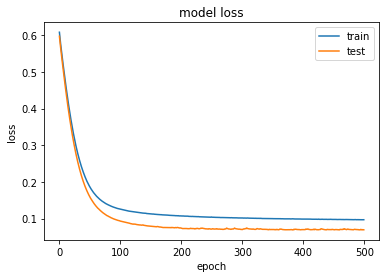

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [23]:
from sklearn.metrics import log_loss
y_pred_prob = model.predict(X_test)
log_loss(y_true=y_test,y_pred=y_pred_prob)

0.06924875190265344

In [24]:
from sklearn.metrics import accuracy_score
predict_classes = model.predict_classes(X_test)
acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")

Accuracy: 0.9809523809523809


C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [26]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=2, mode='auto',
        restore_best_weights=True)
history2 = model.fit(X_train,y_train,validation_data=(X_test,y_test),
                     callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
16/16 - 1s - loss: 0.6704 - accuracy: 0.7587 - val_loss: 0.6627 - val_accuracy: 0.8667
Epoch 2/500
16/16 - 0s - loss: 0.6611 - accuracy: 0.8650 - val_loss: 0.6524 - val_accuracy: 0.9000
Epoch 3/500
16/16 - 0s - loss: 0.6509 - accuracy: 0.8896 - val_loss: 0.6411 - val_accuracy: 0.9000
Epoch 4/500
16/16 - 0s - loss: 0.6395 - accuracy: 0.8896 - val_loss: 0.6282 - val_accuracy: 0.9095
Epoch 5/500
16/16 - 0s - loss: 0.6268 - accuracy: 0.8998 - val_loss: 0.6151 - val_accuracy: 0.9190
Epoch 6/500
16/16 - 0s - loss: 0.6136 - accuracy: 0.9080 - val_loss: 0.6010 - val_accuracy: 0.9286
Epoch 7/500
16/16 - 0s - loss: 0.5998 - accuracy: 0.9100 - val_loss: 0.5865 - val_accuracy: 0.9381
Epoch 8/500
16/16 - 0s - loss: 0.5857 - accuracy: 0.9141 - val_loss: 0.5720 - val_accuracy: 0.9381
Epoch 9/500
16/16 - 0s - loss: 0.5718 - accuracy: 0.9202 - val_loss: 0.5578 - val_accuracy: 0.9524
Epoch 10/500
16/16 - 0s - loss: 0.5583 - accuracy: 0.9284 - val_loss: 0.5435 - val_accuracy: 0.9524
Epoch 11/

16/16 - 0s - loss: 0.1701 - accuracy: 0.9611 - val_loss: 0.1418 - val_accuracy: 0.9810
Epoch 84/500
16/16 - 0s - loss: 0.1684 - accuracy: 0.9611 - val_loss: 0.1400 - val_accuracy: 0.9810
Epoch 85/500
16/16 - 0s - loss: 0.1667 - accuracy: 0.9611 - val_loss: 0.1382 - val_accuracy: 0.9810
Epoch 86/500
16/16 - 0s - loss: 0.1652 - accuracy: 0.9611 - val_loss: 0.1367 - val_accuracy: 0.9810
Epoch 87/500
16/16 - 0s - loss: 0.1638 - accuracy: 0.9611 - val_loss: 0.1350 - val_accuracy: 0.9810
Epoch 88/500
16/16 - 0s - loss: 0.1622 - accuracy: 0.9611 - val_loss: 0.1334 - val_accuracy: 0.9810
Epoch 89/500
16/16 - 0s - loss: 0.1607 - accuracy: 0.9611 - val_loss: 0.1318 - val_accuracy: 0.9810
Epoch 90/500
16/16 - 0s - loss: 0.1593 - accuracy: 0.9611 - val_loss: 0.1302 - val_accuracy: 0.9810
Epoch 91/500
16/16 - 0s - loss: 0.1581 - accuracy: 0.9611 - val_loss: 0.1287 - val_accuracy: 0.9810
Epoch 92/500
16/16 - 0s - loss: 0.1566 - accuracy: 0.9611 - val_loss: 0.1273 - val_accuracy: 0.9810
Epoch 93/500


Epoch 165/500
16/16 - 0s - loss: 0.1115 - accuracy: 0.9611 - val_loss: 0.0779 - val_accuracy: 0.9857
Epoch 166/500
16/16 - 0s - loss: 0.1113 - accuracy: 0.9611 - val_loss: 0.0777 - val_accuracy: 0.9857
Epoch 167/500
16/16 - 0s - loss: 0.1111 - accuracy: 0.9611 - val_loss: 0.0774 - val_accuracy: 0.9857
Epoch 168/500
16/16 - 0s - loss: 0.1110 - accuracy: 0.9611 - val_loss: 0.0771 - val_accuracy: 0.9857
Epoch 169/500
16/16 - 0s - loss: 0.1106 - accuracy: 0.9632 - val_loss: 0.0768 - val_accuracy: 0.9857
Epoch 170/500
16/16 - 0s - loss: 0.1105 - accuracy: 0.9632 - val_loss: 0.0764 - val_accuracy: 0.9810
Epoch 171/500
16/16 - 0s - loss: 0.1103 - accuracy: 0.9632 - val_loss: 0.0761 - val_accuracy: 0.9810
Epoch 172/500
16/16 - 0s - loss: 0.1102 - accuracy: 0.9632 - val_loss: 0.0760 - val_accuracy: 0.9810
Epoch 173/500
16/16 - 0s - loss: 0.1099 - accuracy: 0.9632 - val_loss: 0.0758 - val_accuracy: 0.9810
Epoch 174/500
16/16 - 0s - loss: 0.1097 - accuracy: 0.9632 - val_loss: 0.0756 - val_accurac

Let us see the parameters in the early stopping involved:

monitor: quantity to be monitored.
min_delta: minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
patience: number of epochs with no improvement after which training will be stopped.
mode: one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.
baseline: Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline.
restore_best_weights: whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

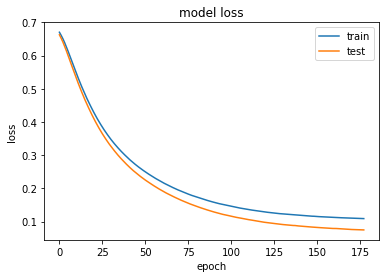

In [28]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [29]:
from sklearn.metrics import log_loss
y_pred_prob = model.predict(X_test)
log_loss(y_true=y_test,y_pred=y_pred_prob)

0.07577712211000506

In [30]:
from sklearn.metrics import accuracy_score
predict_classes = model.predict_classes(X_test)
acc = accuracy_score(y_test,predict_classes)
print(f"Accuracy: {acc}")

Accuracy: 0.9809523809523809


C:\Users\User\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
